In [1]:
import os

curr_dir = os.path.split(os.getcwd())[1]
if curr_dir != "irl-environment-design":
    os.chdir("..")
import numpy as np
import matplotlib.pyplot as plt

import src.atomic_worlds.big_small as bs
import src.utils.param_sweep as ps
import src.utils.transition_matrix as tm
import src.utils.make_environment as make_env
import src.worlds.mdp2d as mdp2d

from src.utils.visualization import plot_environment


In [2]:
# Set the number of scales and gammas to use
granularity = 20  # 5, 10, 20

# Set up parameters to search over
probs = np.linspace(0.4, 0.99, granularity)
gammas = np.linspace(0.4, 0.99, granularity)

In [3]:
def convert_to_environment(world: mdp2d.Experiment_2D):
    """Converts a world to an environment."""
    N = world.height
    M = world.width

    # R_dict = world.rewards_dict
    # R = np.zeros(N * M)
    # for key in R_dict:
    #     R[key] = R_dict[key]
    

    T = world.mdp.T

    environment = make_env.Environment(
        N=N,
        M=M,
        T_true=T,
        wall_states=[],
        R_sample_mean=None,
        start_state=0,
        n_walls=0,
        R_true=world.rewards,
    )

    return environment

In [4]:
def plot_bmap(
    world: mdp2d.Experiment_2D,
    idx_map=None,
    p2idx_override=None,
    tmatrix_func=tm.id_func,
    start_state=0,
    ax=None,
):
    result = ps.run_experiment(
        experiment=world,
        transition_matrix_func=tmatrix_func,
        params=world.params,
        gammas=gammas,
        probs=probs,
        start_state=start_state,
    )

    data = result.data

    if idx_map:
        new_data = np.zeros_like(data)
        for fromm, to in idx_map.items():
            new_data[data == fromm] = to
        data = new_data

    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 4))

    ps.make_general_strategy_heatmap(
        results=data,
        probs=probs,
        p2idx=p2idx_override,
        title=f"",
        ax=ax,
        gammas=gammas,
        annot=False,
        ax_labels=False,
        num_ticks=5,
        legend=False
    )
    return result

## Define Custom worlds


In [5]:
from src.worlds.mdp2d import Experiment_2D

def make_world(
    height: int,
    width: int,
    rewards: np.array,
    absorbing_states: list,
    wall_states: list
) -> Experiment_2D:

    experiment = Experiment_2D(
        height,
        width,
        rewards = rewards,
        absorbing_states = absorbing_states,
        wall_states=wall_states
    )

    return experiment

In [21]:
height = 5
width = 6
rewards = np.zeros((height, width))
wall_states = np.zeros((height, width))

rewards[4,0] = 2
rewards[4,5] = 4
rewards = rewards.flatten()

absorbing_states = np.where(rewards > 0)[0]

wall_states[2,1] = 1
wall_states = wall_states.flatten()
wall_states = np.where(wall_states > 0)[0]


custom_world = make_world(height=height,
                          width=width,
                          rewards=rewards,
                          absorbing_states=absorbing_states,
                          wall_states=wall_states)

Num different policies: 0
[]


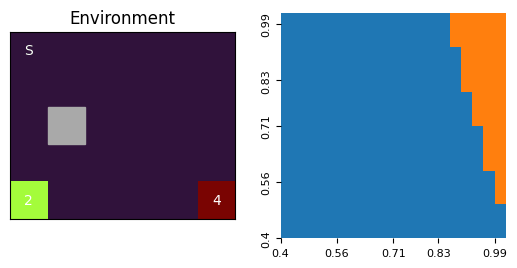

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2)

new_env = convert_to_environment(custom_world)

plot_environment(new_env.R_true.reshape(height, width), wall_states=wall_states, ax= axs[0])
out = plot_bmap(
    world=custom_world,
    # idx_map=idx_map_bs,
    # p2idx_override=p2idx_override_bs,
    # tmatrix_func=tm.id_func,
    ax=axs[1],
)

In [23]:
out

ExperimentResult(data=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0